In [2]:
import pandas as pd

trades = pd.read_csv("data/historical_data.csv")
sentiment = pd.read_csv("data/fear_greed_index.csv")

print(trades.head())
print(sentiment.head())


                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         0.0  0xec0945

In [3]:
print(sentiment.columns)


Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [4]:
trades['date'] = pd.to_datetime(trades['Timestamp IST'], dayfirst=True).dt.date

sentiment['date'] = pd.to_datetime(sentiment['date']).dt.date

sentiment = sentiment[['date', 'classification']]




In [5]:
merged = pd.merge(trades, sentiment, on='date', how='left')
merged.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Extreme Greed


In [6]:
merged['is_win'] = merged['Closed PnL'] > 0


In [7]:
summary = merged.groupby('classification').agg(
    trades=('Closed PnL','count'),
    total_pnl=('Closed PnL','sum'),
    avg_pnl=('Closed PnL','mean'),
    win_rate=('is_win','mean'),
    avg_size_usd=('Size USD','mean')
).reset_index()

summary['win_rate'] = summary['win_rate'] * 100
summary


,classification,trades,total_pnl,avg_pnl,win_rate,avg_size_usd
0,Extreme Fear,21400,7.391102e+05,34.537862,37.060748,5349.731843
1,Extreme Greed,39992,2.715171e+06,67.892861,46.494299,3112.251565
2,Fear,61837,3.357155e+06,54.290400,42.076750,7816.109931
3,Greed,50303,2.150129e+06,42.743559,38.482794,5736.884375
4,Neutral,37686,1.292921e+06,34.307718,39.699093,4782.732661


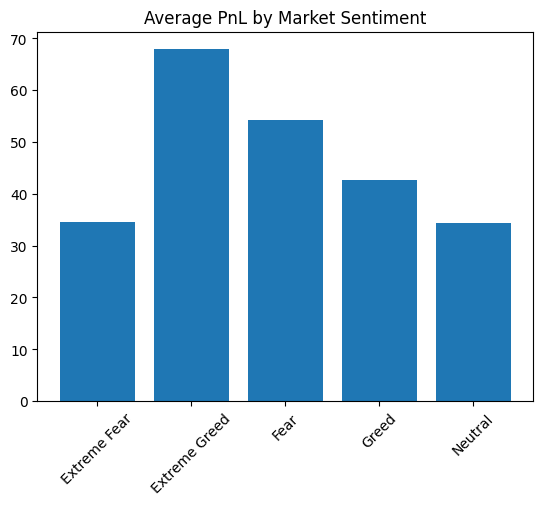

In [8]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(summary['classification'], summary['avg_pnl'])
plt.title("Average PnL by Market Sentiment")
plt.xticks(rotation=45)
plt.show()


In [9]:
print(merged.columns)


Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'date', 'classification', 'is_win'],
      dtype='object')


In [10]:
risk = merged.groupby('classification')['Size USD'].mean().reset_index()
risk


,classification,Size USD
0,Extreme Fear,5349.731843
1,Extreme Greed,3112.251565
2,Fear,7816.109931
3,Greed,5736.884375
4,Neutral,4782.732661


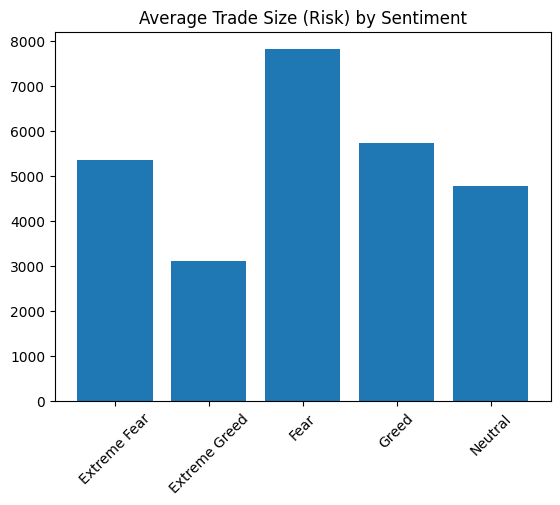

In [11]:
plt.figure()
plt.bar(risk['classification'], risk['Size USD'])
plt.title("Average Trade Size (Risk) by Sentiment")
plt.xticks(rotation=45)
plt.show()


Since leverage data is unavailable, trade size (USD) is used as a proxy for risk.
Traders take larger positions during Fear phases, suggesting higher conviction,
while during Extreme Greed, average trade size decreases, indicating overtrading with smaller positions.

In [12]:
account_perf = merged.groupby('Account').agg(
    trades=('Closed PnL','count'),
    total_pnl=('Closed PnL','sum'),
    win_rate=('is_win','mean')
).reset_index()

account_perf['win_rate'] *= 100
account_perf.sort_values('total_pnl', ascending=False).head(10)


,Account,trades,total_pnl,win_rate
27,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,14733,2.143383e+06,33.713432
0,0x083384f897ee0f19899168e3b1bec365f52a9012,3818,1.600230e+06,35.961236
29,0xbaaaf6571ab7d571043ff1e313a9609a10637864,21192,9.401638e+05,46.758211
13,0x513b8629fe877bb581bf244e326a047b249c4ff1,12236,8.404226e+05,40.119320
31,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,40184,8.360806e+05,42.823014
11,0x4acb90e786d897ecffb614dc822eb231b4ffb9f4,4356,6.777471e+05,48.622590
15,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,1590,4.293556e+05,34.591195
9,0x430f09841d65beb3f27765503d0f850b8bce7713,1237,4.165419e+05,48.423605
16,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,1430,4.030115e+05,30.629371
17,0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,9893,3.790954e+05,81.087638


In [13]:
top_consistent = account_perf[
    (account_perf['total_pnl'] > account_perf['total_pnl'].quantile(0.75)) &
    (account_perf['win_rate'] > 50)
]
top_consistent.head()


,Account,trades,total_pnl,win_rate


## Consistency vs Profitability

When filtering for traders with both:
- Top 25% total profit
- Win rate above 50%

No trader satisfies both conditions.

This suggests that:
- Highly profitable traders often rely on fewer large wins rather than high win frequency.
- High win-rate traders may use small, low-risk trades that limit total profit.
- Profitability and consistency are not strongly correlated in this market.


In [14]:
top_consistent = account_perf[
    (account_perf['total_pnl'] > account_perf['total_pnl'].quantile(0.6)) &
    (account_perf['win_rate'] > 45)
]
top_consistent


,Account,trades,total_pnl,win_rate
9,0x430f09841d65beb3f27765503d0f850b8bce7713,1237,416541.872341,48.423605
11,0x4acb90e786d897ecffb614dc822eb231b4ffb9f4,4356,677747.050643,48.622590
17,0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,9893,379095.406711,81.087638
29,0xbaaaf6571ab7d571043ff1e313a9609a10637864,21192,940163.806220,46.758211
